In [48]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

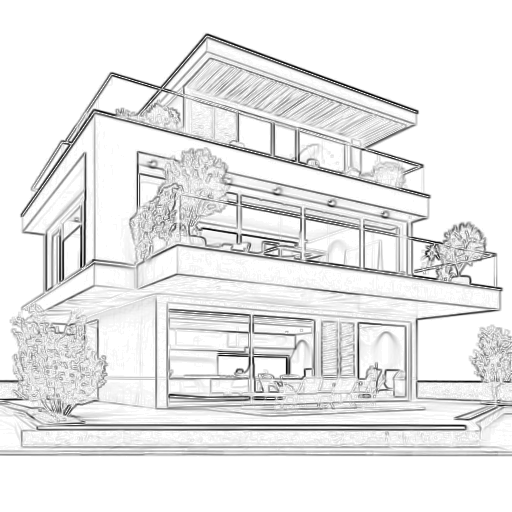

In [51]:
from PIL import Image

image = Image.open("test_2.png")
image.thumbnail((512, 512))
image = image.convert("RGB")
image

In [52]:
prompts = ["wood timber material wall", "stone material wall", "window", "door"]
inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

d:\python-venvs\actual\Lib\site-packages\transformers\image_processing_utils.py:44: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


[Text(0, -15, 'wood timber material wall'),
 Text(0, -15, 'stone material wall'),
 Text(0, -15, 'window'),
 Text(0, -15, 'door')]

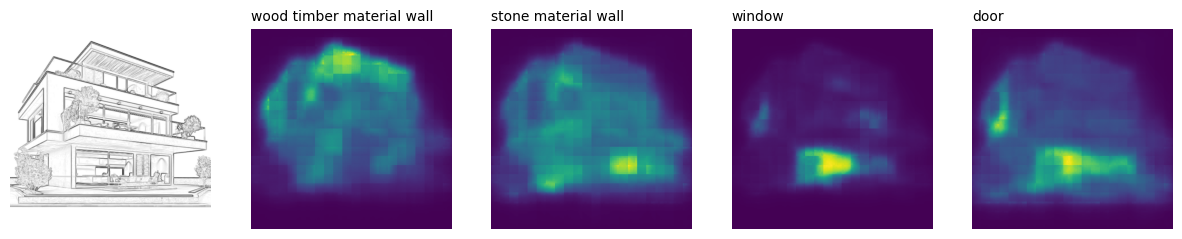

In [53]:
import torch
import matplotlib.pyplot as plt

with torch.no_grad():
    outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

_, ax = plt.subplots(1, len(prompts ) + 1, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))]
[ax[i+1].text(0, -15, prompts[i]) for i in range(len(prompts))]

In [54]:
preds = preds.squeeze(1)
sigmoid = torch.sigmoid(preds)

threshold = 0.3
thresholded_sigmoid = sigmoid * (sigmoid > threshold)

In [55]:
max_indices = torch.argmax(thresholded_sigmoid, dim=0)
one_hot_masks = (torch.arange(preds.shape[0])[:, None, None] == max_indices).to(torch.uint8)

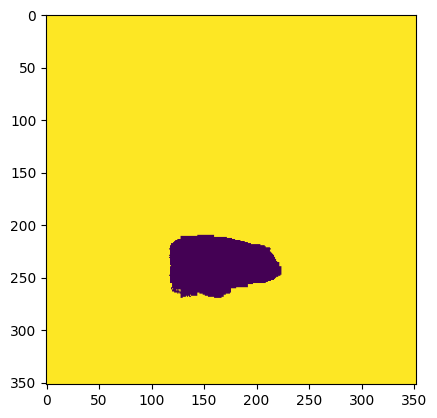

In [60]:
plt.imshow(one_hot_masks[0])